In [1]:
FC_DEPTH = 20
MAX_ITER = 1000
TARGET_DIFF = 1e-8

In [2]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline

In [3]:
import os,sys,inspect
sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [4]:
import torchvision.datasets as dataset
from utils import trainer, visualizer

### Dataset

In [5]:
mnist = dataset.MNIST('../data', download=True)

In [6]:
fashin = dataset.FashionMNIST('../data', download=True)

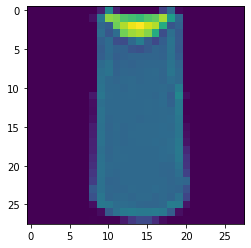

In [7]:
target = fashin.data[2]
imshow(fashin.data[2])

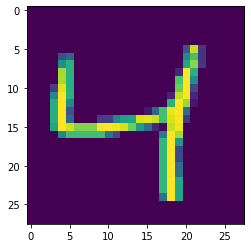

In [8]:
target = mnist.data[2]
imshow(mnist.data[2])

### Network - Train

In [9]:
import torch
import torch.nn as nn

In [10]:
class CNN(nn.Module):
    def __init__(self, depth, activation=nn.Sigmoid()):
        assert depth > 0

        super(CNN,self).__init__()
        if depth > 1: li = [nn.Conv2d(1, 128, kernel_size=(5,5), padding=2)]
        else: li = [nn.Conv2d(1, 1, kernel_size=(5,5), padding=2)]
        for i in range(depth-1):
            if i != depth-2:
                li.append(nn.Conv2d(128, 128, kernel_size=(5,5), padding=2))
            elif i == depth-2:
                li.append(nn.Conv2d(128, 1, kernel_size=(5,5), padding=2))
        
        self.net = nn.Sequential(*li)
        self.activation = activation
    
    def forward(self, x):
        return self.activation(self.net(x))

In [11]:
model = CNN(FC_DEPTH, lambda x: x)
target_flt = (target/256.).unsqueeze(0).unsqueeze(0)

In [12]:
model

CNN(
  (net): Sequential(
    (0): Conv2d(1, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (2): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (6): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (7): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (8): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (9): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (10): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (11): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (12): Conv2d(128, 128, kernel_size=(5, 5), str

In [14]:
img = visualizer.predictor(model, [target_flt], cuda=False, model_type='cnn')

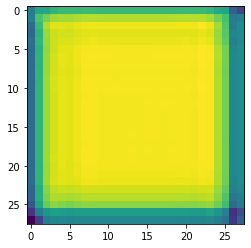

In [15]:
imshow(img)

In [16]:
trainer.reconst_trainer(model.cuda(), target_flt.cuda(), obj_threshold=TARGET_DIFF, max_iter=MAX_ITER)

### Visualize

In [17]:
target_images = []

In [18]:
target_images.append(mnist.data[2]/256.)
target_images.append(fashin.data[2]/256.)

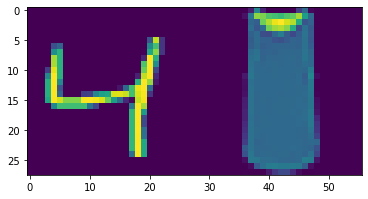

In [19]:
imshow(np.concatenate(target_images, axis=1))

In [20]:
target_images_ = []
for images in target_images:
    target_images_.append(images.unsqueeze(0).unsqueeze(0))

In [21]:
img = visualizer.predictor(model, target_images_, model_type='cnn')

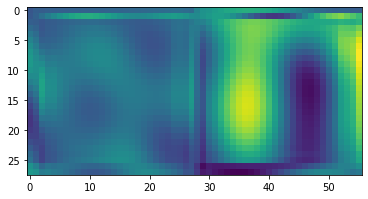

In [22]:
imshow(img)